# Visualizing filters in Pytorch

### Imports

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
%matplotlib inline

Image shape: (224, 224)


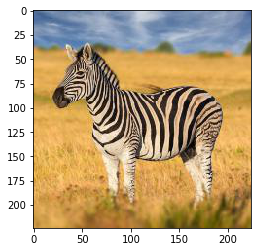

In [2]:
image = Image.open("images/zebra.jpg")
plt.imshow(image)
print("Image shape:", image.size)

### Model definition
In this example we will use a pre-trained ResNet50 network. ResNet-50 is a fully-convolutional neural network that excels at image classification.

In [3]:
model = torchvision.models.resnet50(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Kari Ness/.cache\torch\checkpoints\resnet50-19c8e357.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:13<00:00, 7.81MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

)


### First convolution layer
In this task we are interested in visualizing the first convolutional layer. This can be retrieved by the following code block:

We can see that it has 64 filters/kernels in the layer. Each kernel is a $7 \times 7$ filter, that takes an RGB image as input

In [5]:
first_conv_layer = model.conv1
print("First conv layer weight shape:", first_conv_layer.weight.shape)
print("First conv layer:", first_conv_layer)

First conv layer weight shape: torch.Size([64, 3, 7, 7])
First conv layer: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


### Activation from first layer
We can retrieve the activation from the first layer by doing a forward pass throught this conv layer.

However, first we need to resize, and normalize the image with the mean and standard deviation that they used to originally train this network.

In [6]:
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [7]:
image = image_transform(image)[None]
print("Image shape:", image.shape)

Image shape: torch.Size([1, 3, 224, 224])


In [8]:
activation = first_conv_layer(image)
print("Activation shape:", activation.shape)

Activation shape: torch.Size([1, 64, 112, 112])


### Visualize filters & Activation

In [9]:
# tip
# To transform a weight to a numpy array, you can use to function
def torch_image_to_numpy(image: torch.Tensor):
    # Normalize to [0 - 1.0]
    image = image.detach().cpu() # Transform image to CPU memory (if on GPU VRAM)
    image = image - image.min()
    image = image / image.max()
    image = image.numpy()
    if len(image.shape) == 2: # Grayscale image, can just return
        return image
    assert image.shape[0] == 3, "Expected color channel to be on first axis. Got: {}".format(image.shape)
    image = np.moveaxis(image, 0, 2)
    return image
    

<Figure size 1440x1440 with 0 Axes>

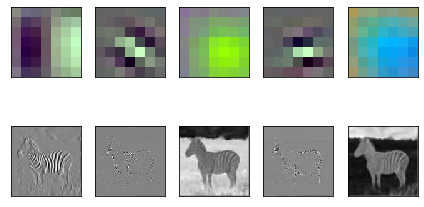

In [21]:

### START YOUR CODE HERE ### (You can change anything inside this block)
# plt.subplot is a nice function to use for this task!
indices = [5,8,19,22,34]
# %%
plt.figure(figsize=(20, 20))

fig, axs = plt.subplots(nrows=2, ncols=5, subplot_kw={'xticks': [], 'yticks': []})
k=0
for i in indices:
     
    layer = first_conv_layer.weight[i,:,:,:]
    im = torch_image_to_numpy(layer)
    axs[0,k].imshow(im, cmap='gray')
    
    act = activation[0, i,:,:]
    im = torch_image_to_numpy(act)
    axs[1,k].imshow(im, cmap='gray')
    k += 1

plt.tight_layout()

plt.savefig('zebra.png')

# %%
### END YOUR CODE HERE ### 
